# Numerical Methods - Usage (Julia)

In [1]:
include("solve_ode_ivp.jl");

# Solving ODEs

In [2]:
function ode(t, y)
    return -2*y
end;

y_out, t_out = rk_45(ode, 1.0, 0, 2, 0.001);

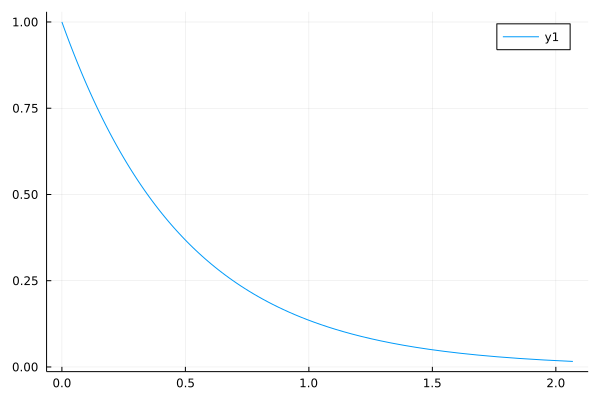

In [3]:
using Plots
plot(t_out, y_out)

In [4]:
re = 6378.0e3
g0 = 9.807

y1_0 = 6500.0e3
y2_0 = 7.8e3

S0 = [y1_0, y2_0]

function ode2(t, S)
    y1, y2 = S
    return [y2, -(g0 * re^2) / (y1^2)]
end;

In [5]:
s_out_45, t_out_45 = rk_45(ode2, S0, 0, 60*70, 1000);

pos_out = [s_out_45[i][1] for i=1:size(s_out_45, 1)];
vel_out = [s_out_45[i][2] for i=1:size(s_out_45, 1)];

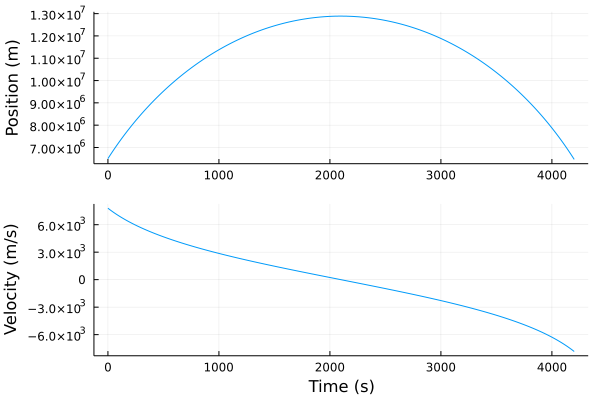

In [6]:
using Plots
pos_plot = plot(t_out_45, pos_out, ylabel="Position (m)")
vel_plot = plot(t_out_45, vel_out, xlabel="Time (s)", ylabel="Velocity (m/s)")

plot(pos_plot, vel_plot, layout=(2,1), legend=false)